In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import time

from sklearn.model_selection import ParameterGrid
from sklearn.model_selection import train_test_split


import keras
import keras.backend as K
from keras import models
from keras import layers
from keras.optimizers import RMSprop
from keras.optimizers import Adam
from keras.models import Model
from keras.layers import Input, Dense


import scipy.io as sio

import scipy.sparse
from mpl_toolkits.mplot3d import Axes3D

print("TensorFlow version:", tf.__version__)

TensorFlow version: 2.10.1


# Build Neural Network Model

In [2]:
def model_1():
        network = models.Sequential()
        
        # define layers of the neural network
        network.add(layers.Dense(25, activation='tanh', kernel_initializer='random_normal', use_bias=False, input_dim = 20))
        network.add(layers.Dense(25, activation='tanh', kernel_initializer='random_normal',  use_bias=False))
        network.add(layers.Dense(25, activation='tanh', kernel_initializer='random_normal',  use_bias=False))
        network.add(layers.Dense(20, activation='relu', kernel_initwializer='random_uniform', use_bias=False))
        # network.add(layers.Dense(4, activation = 'linear',kernel_initializer='random_normal',use_bias=False))
        # number of training neurons = 20*25+25*25+25*25+25*20
        
        # define the optimizer, with different loss function
        # network.compile(optimizer = RMSprop(), loss='mean_squared_error', metrics=['mse'])
        #network.compile(optimizer=RMSprop(), loss='mean_absolute_percentage_error', metrics=['mse'])  # 'mean_absolute_percentage_error' is another option
        network.compile(optimizer=Adam(), loss='mean_squared_error')
        return network

In [3]:
def model_2():
        network = models.Sequential()
        
        # define layers of the neural network
        network.add(layers.Dense(100, activation='tanh', kernel_initializer='random_normal', use_bias=False, input_dim = 100))
        network.add(layers.Dense(100, activation='tanh', kernel_initializer='random_normal',  use_bias=False))
        network.add(layers.Dense(100, activation='tanh', kernel_initializer='random_normal',  use_bias=False))
        network.add(layers.Dense(100, activation='relu', kernel_initializer='random_uniform', use_bias=False))
        # network.add(layers.Dense(4, activation = 'linear',kernel_initializer='random_normal',use_bias=False))
        # number of training neurons = 
        
        # define the optimizer, with different loss function
        # network.compile(optimizer = RMSprop(), loss='mean_squared_error', metrics=['mse'])
        #network.compile(optimizer=RMSprop(), loss='mean_absolute_percentage_error', metrics=['mse'])  # 'mean_absolute_percentage_error' is another option
        network.compile(optimizer=Adam(), loss='mean_squared_error')
        return network

In [30]:
def model_3():
        network = models.Sequential()
        
        # define layers of the neural network
        network.add(layers.Dense(25, activation='tanh', kernel_initializer='random_normal', use_bias=False, input_dim = 25))
        # network.add(layers.Dense(25, activation='tanh', kernel_initializer='random_normal',  use_bias=False))
        network.add(layers.Dense(25, activation='tanh', kernel_initializer='random_normal',  use_bias=False))
        # network.add(layers.Dense(25, activation='tanh', kernel_initializer='random_normal',  use_bias=False))
        # network.add(layers.Dense(25, activation='tanh', kernel_initializer='random_normal',  use_bias=False))
        # network.add(layers.Dense(25, activation='tanh', kernel_initializer='random_normal',  use_bias=False))
        network.add(layers.Dense(25, activation='relu', kernel_initializer='random_uniform', use_bias=False))
        # network.add(layers.Dense(4, activation = 'linear',kernel_initializer='random_normal',use_bias=False))
        # number of training neurons = 20*25+25*25+25*25+25*20
        
        # define the optimizer, with different loss function
        # network.compile(optimizer = RMSprop(), loss='mean_squared_error', metrics=['mse'])
        #network.compile(optimizer=RMSprop(), loss='mean_absolute_percentage_error', metrics=['mse'])  # 'mean_absolute_percentage_error' is another option
        network.compile(optimizer=Adam(), loss='mean_squared_error')
        return network

# Neural Network of Non-linear equation

In [3]:
# testing neural network
# df = pd.read_csv("1000sample.csv")
df = pd.read_csv("test_sample.csv")

with tf.device(device_name='/GPU:0'):
    
    model = model_1()
    input_data = []
    output_data = []
    for k in range(20):
        input_data.append(f'input{k}')
        output_data.append(f'output{k}')
        pass
    X = df[input_data]
    y = df[output_data]
    
    start_time = time.time()
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state = 7)
    history_full = model.fit(X_train, y_train, batch_size = 64, epochs = 50, verbose = 2, validation_split=0.2) # set batch size to 1
    end_time = time.time()
    pass

Epoch 1/50
1125/1125 - 3s - loss: 0.3161 - val_loss: 0.0034 - 3s/epoch - 2ms/step
Epoch 2/50
1125/1125 - 1s - loss: 9.3750e-04 - val_loss: 1.8648e-04 - 1s/epoch - 1ms/step
Epoch 3/50
1125/1125 - 1s - loss: 1.3729e-04 - val_loss: 7.9906e-05 - 1s/epoch - 1ms/step
Epoch 4/50
1125/1125 - 1s - loss: 7.4924e-05 - val_loss: 7.4230e-05 - 1s/epoch - 1ms/step
Epoch 5/50
1125/1125 - 1s - loss: 4.4260e-05 - val_loss: 2.1192e-05 - 1s/epoch - 1ms/step
Epoch 6/50
1125/1125 - 1s - loss: 2.9173e-05 - val_loss: 3.8032e-05 - 1s/epoch - 1ms/step
Epoch 7/50
1125/1125 - 1s - loss: 2.7420e-05 - val_loss: 7.8150e-05 - 1s/epoch - 1ms/step
Epoch 8/50
1125/1125 - 1s - loss: 1.8268e-05 - val_loss: 2.7444e-05 - 1s/epoch - 1ms/step
Epoch 9/50
1125/1125 - 1s - loss: 1.9400e-05 - val_loss: 8.1637e-06 - 1s/epoch - 1ms/step
Epoch 10/50
1125/1125 - 1s - loss: 1.5751e-05 - val_loss: 4.7335e-06 - 1s/epoch - 1ms/step
Epoch 11/50
1125/1125 - 1s - loss: 1.9356e-05 - val_loss: 6.9696e-06 - 1s/epoch - 1ms/step
Epoch 12/50
1125

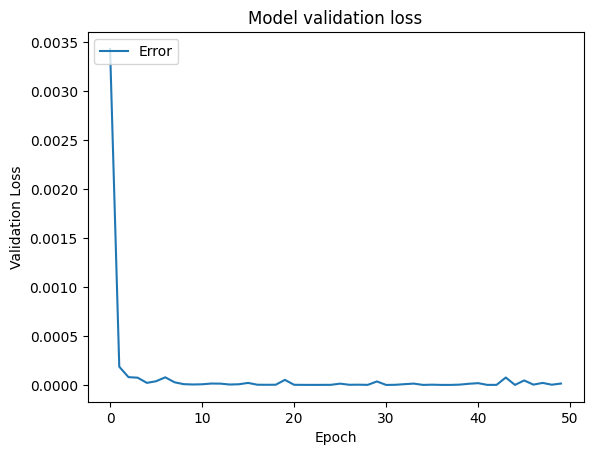

313/313 [==============================] - 0s 835us/step - loss: 1.4565e-05
the testing error is:  1.4565217497874983e-05


In [4]:
plt.plot(history_full.history['val_loss'])
plt.title('Model validation loss')
plt.ylabel('Validation Loss')
plt.xlabel('Epoch')
plt.legend(['Error', 'Test'], loc='upper left')
plt.show()
X_test_full = X_test
y_test_full = y_test
print("the testing error is: ", model.evaluate(x = X_test, y = y_test))

# Neural Network of BS equation

In [33]:
df = pd.read_csv("25sample.csv")
# df = pd.read_csv("test_sample.csv")

with tf.device(device_name='/GPU:0'):
    
    model = model_3()
    input_data = []
    output_data = []
    for k in range(25):
        input_data.append(f'input{k}')
        output_data.append(f'output{k}')
        pass
    X = df[input_data]
    y = df[output_data]
    
    start_time = time.time()
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state = 7)
    history_full = model.fit(X_train, y_train, batch_size = 64, epochs = 20, verbose = 2, validation_split=0.2) # set batch size to 1
    end_time = time.time()
    pass

Epoch 1/20
1125/1125 - 1s - loss: 8298.4707 - val_loss: 6955.0762 - 1s/epoch - 1ms/step
Epoch 2/20
1125/1125 - 1s - loss: 5933.0962 - val_loss: 5028.6577 - 1s/epoch - 1ms/step
Epoch 3/20
1125/1125 - 1s - loss: 4326.2261 - val_loss: 3708.1938 - 1s/epoch - 1ms/step
Epoch 4/20
1125/1125 - 1s - loss: 3240.8044 - val_loss: 2837.6904 - 1s/epoch - 1ms/step
Epoch 5/20
1125/1125 - 1s - loss: 2548.9238 - val_loss: 2308.5417 - 1s/epoch - 1ms/step
Epoch 6/20
1125/1125 - 1s - loss: 2150.7827 - val_loss: 2026.0591 - 1s/epoch - 1ms/step
Epoch 7/20
1125/1125 - 1s - loss: 1953.6587 - val_loss: 1900.5167 - 1s/epoch - 1ms/step
Epoch 8/20
1125/1125 - 1s - loss: 1875.0198 - val_loss: 1858.4398 - 1s/epoch - 1ms/step
Epoch 9/20
1125/1125 - 1s - loss: 1852.7837 - val_loss: 1849.8525 - 1s/epoch - 1ms/step
Epoch 10/20
1125/1125 - 1s - loss: 1849.3647 - val_loss: 1849.1846 - 1s/epoch - 1ms/step
Epoch 11/20
1125/1125 - 1s - loss: 1849.1893 - val_loss: 1849.1760 - 1s/epoch - 1ms/step
Epoch 12/20
1125/1125 - 1s - l

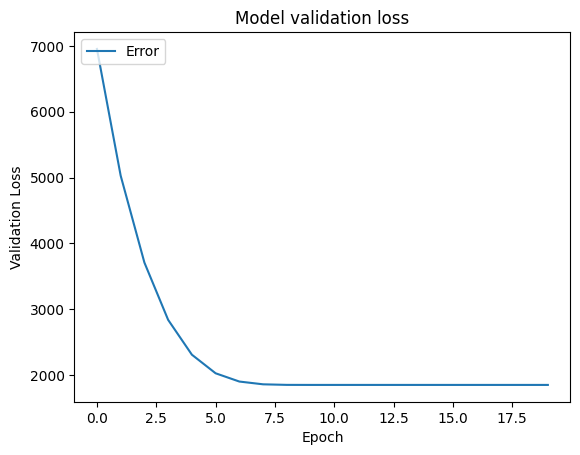

313/313 [==============================] - 0s 759us/step - loss: 1849.1974
the testing error is:  1849.1973876953125


In [35]:
plt.plot(history_full.history['val_loss'])
plt.title('Model validation loss')
plt.ylabel('Validation Loss')
plt.xlabel('Epoch')
plt.legend(['Error', 'Test'], loc='upper left')
plt.show()
X_test_full = X_test
y_test_full = y_test
print("the testing error is: ", model.evaluate(x = X_test, y = y_test))

In [36]:
test_input = np.array(df.iloc[4, 0:25].tolist()).reshape(1,25)
print(test_input)
predictions = model.predict(test_input)
print(predictions)

[[0.00000000e+00 0.00000000e+00 6.12622969e-22 2.13085222e-15
  1.37473593e-09 2.34996969e-04 1.00000700e+01 2.00000700e+01
  3.00000700e+01 4.00000700e+01 5.00000700e+01 6.00000700e+01
  7.00000700e+01 8.00000700e+01 9.00000700e+01 1.00000070e+02
  1.10000070e+02 1.20000070e+02 1.30000070e+02 1.40000070e+02
  1.50000070e+02 1.60000070e+02 1.70000070e+02 1.80000070e+02
  1.90000070e+02]]
1/1 [==============================] - 0s 10ms/step
[[0.0000000e+00 0.0000000e+00 0.0000000e+00 2.3845673e-02 0.0000000e+00
  2.3447876e+00 1.1059082e+01 2.0848633e+01 3.0816406e+01 4.0809570e+01
  0.0000000e+00 6.0804688e+01 7.0806641e+01 0.0000000e+00 0.0000000e+00
  1.0081055e+02 1.1079297e+02 1.2077734e+02 1.3073047e+02 1.4066016e+02
  1.5053516e+02 1.6028906e+02 0.0000000e+00 1.7913672e+02 1.8803125e+02]]


In [37]:
test_input = np.array(df.iloc[90002, 0:25].tolist()).reshape(1,25)
print(test_input)
predictions = model.predict(test_input)
print(predictions)

[[0.00000000e+00 8.26134448e-06 1.16735040e-03 4.32419413e-02
  6.15213597e-01 3.89928410e+00 1.20584680e+01 2.16545579e+01
  3.15716887e+01 4.15548743e+01 5.15514116e+01 6.15506430e+01
  7.15502734e+01 8.15493317e+01 9.15460809e+01 1.01536207e+02
  1.11510200e+02 1.21449955e+02 1.31325424e+02 1.41092562e+02
  1.50693714e+02 1.60060874e+02 1.69121249e+02 1.77803916e+02
  1.86046131e+02]]
1/1 [==============================] - 0s 10ms/step
[[0.0000000e+00 0.0000000e+00 0.0000000e+00 2.3845673e-02 0.0000000e+00
  2.3447876e+00 1.1059082e+01 2.0848633e+01 3.0816406e+01 4.0809570e+01
  0.0000000e+00 6.0804688e+01 7.0806641e+01 0.0000000e+00 0.0000000e+00
  1.0081055e+02 1.1079297e+02 1.2077734e+02 1.3073047e+02 1.4066016e+02
  1.5053516e+02 1.6028906e+02 0.0000000e+00 1.7913672e+02 1.8803125e+02]]
